In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import Library

from sklearn.preprocessing import StandardScaler

## <hr><center>Pre-classification processing</center><hr>

The purpose of this notebook is to separate the concerns between splitting the dataset and providing attributes.
In this notebook the following steps are followed:
    1. The semantics of the binary label is established.
    2. The dataset is split into 20% test and saved in a different file.
    3. Normalization and selection of the attributes is performed.
    4. The datasets ready for classification are saved. 

In [ ]:
# Load the players dataset.

players_df = pd.read_csv('../data_cleaned/players.csv')
print(f'(players_df) Loading {players_df.shape[0]} rows from "../data_cleaned/players_df.csv"')
players_statistics = Library.deserialize_statistics('../data_cleaned/players_df.stat')

(players_df) Loading 1918 rows from "../data_cleaned/players_df.csv"


## <hr><center>Define the binary classification label</center><hr>

In [ ]:
# We define the top_players as the 15% of the players with highest performance indicator.
top_players_percentile = 85

# Compute the performance indicator, defined as the ratio between rank_points and rank.
players_df['performance'] = players_df['rank_points']/players_df['rank']

# Set the treshold for the performance indicator.
top_players_threshold = np.percentile(players_df['performance'], top_players_percentile)

# Assign the top_players to the top_players_df.
players_df['high_profile'] = (players_df['performance'] >= top_players_threshold).astype('int')

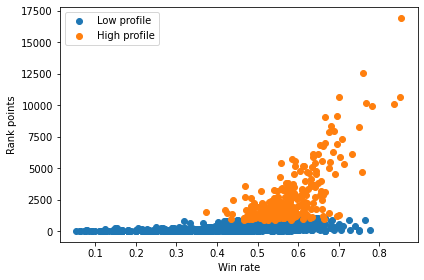

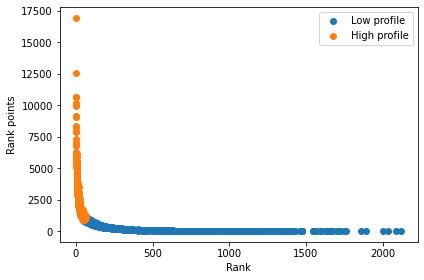

In [ ]:
# Graphically visualize the player distribution over the performance indicator, considering rank, rank_points, and win_rate.
 
plt.scatter(x=players_df[players_df['high_profile']==0]['win_rate'], y=players_df[players_df['high_profile']==0]['rank_points'], label='Low profile')
plt.scatter(x=players_df[players_df['high_profile']==1]['win_rate'], y=players_df[players_df['high_profile']==1]['rank_points'], label='High profile')
plt.legend()
plt.xlabel('Win rate')
plt.ylabel('Rank points')
Library.save('rank_points_win_rate.svg')
plt.show()
plt.scatter(x=players_df[players_df['high_profile']==0]['rank'], y=players_df[players_df['high_profile']==0]['rank_points'], label='Low profile')
plt.scatter(x=players_df[players_df['high_profile']==1]['rank'], y=players_df[players_df['high_profile']==1]['rank_points'], label='High profile')
plt.xlabel('Rank')
plt.ylabel('Rank points')
plt.legend()
Library.save('rank_points_rank.svg')
plt.show()

In [ ]:
# As a sanity check, verify the dataset size.
players_df['high_profile'].value_counts()

0    1599
1     283
Name: high_profile, dtype: int64

## <hr><center>Split the dataset into 20% test set</center><hr>

In [ ]:
from sklearn.model_selection import train_test_split

# Perform the train-test split.

train_df, test_df = train_test_split(players_df, test_size=0.2, random_state=1)

In [ ]:
# Verify the percentages on train.
train_df['high_profile'].value_counts() / train_df.shape[0]

0    0.851163
1    0.148837
Name: high_profile, dtype: float64

In [ ]:
# Verify the percentages on test.
test_df['high_profile'].value_counts() / test_df.shape[0]

0    0.843501
1    0.156499
Name: high_profile, dtype: float64

## <hr><center>Save the classification profile of the dataset</center><hr>

In [ ]:
#classification_attributes = Library.numerical_attributes(players_statistics) + ["high_profile"]

# Define the set of classification attributes we selected.
classification_attributes = \
    ['avg_ace%', 'avg_df%', 'avg_1st%', 'avg_2ndWin%', 'avg_bpSaved%', 'avg_ptWon%', 
     'win_rate', 'n_matches', 'tournament_wins', 'high_profile']

# Filter the datasets to the classification profile attributes.
test_df  = test_df[classification_attributes]
train_df = train_df[classification_attributes]

# Ensure that rank and rank_points are removed from the training and test set.
train_df = train_df.drop(columns=['rank_points', 'rank'])
test_df = test_df.drop(columns=['rank_points', 'rank'])

In [ ]:
# Add the classification label as the last attribute of the nparray.
train_data = train_df.values
test_data = test_df.values

train_X, train_y = train_data[:, :-1], train_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

# Normalize the data using StandardScaler.
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
# Finally, save the datasets to the data_classification folder.

print(f'(train_X) Saving {train_X.shape[0]} rows to "../data_classification/train_X.csv"')
np.savetxt("../data_classification/train_X.csv", train_X, delimiter=",")
print(f'(train_y) Saving {train_y.shape[0]} rows to "../data_classification/train_y.csv"')
np.savetxt("../data_classification/train_y.csv", train_y, delimiter=",")

print(f'(test_X) Saving {test_X.shape[0]} rows to "../data_classification/test_X.csv"')
np.savetxt("../data_classification/test_X.csv", test_X, delimiter=",")
print(f'(test_y) Saving {test_y.shape[0]} rows to "../data_classification/test_y.csv"')
np.savetxt("../data_classification/test_y.csv", test_y, delimiter=",")

(train_X) Saving 1505 rows to "../data_classification/train_X.csv"
(train_y) Saving 1505 rows to "../data_classification/train_y.csv"
(test_X) Saving 377 rows to "../data_classification/test_X.csv"
(test_y) Saving 377 rows to "../data_classification/test_y.csv"
